## Libs import and config

In [1]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import os, re
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 500)
pd.set_option('display.max_rows', 500)

In [2]:
filepath = '/Users/leoguillaume/Documents/openclassrooms-projects/openclassrooms-project-2/data/Projet+Python_Dataset_Edstats_csv/'

## Data import

In [3]:
csv_list = os.listdir(filepath)

In [4]:
for csv in csv_list:
    locals()[csv[:-4]] = pd.read_csv(os.path.join(filepath,csv))

In [5]:
for csv in csv_list:
    print(csv+'\n'+40*'-')
    locals()[csv[:-4]].info()
    print('\n')

EdStatsCountry.csv
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                  

## Tables shapes

In [6]:
print('Row\n' + 30*'-')
for csv in csv_list:
    print(f"{csv}: {str(locals()[csv[:-4]].shape[0])}")
    
print('\nFeaures\n' + 30*'-')
for csv in csv_list:
    print(f"{csv}: {str(locals()[csv[:-4]].shape[1])}")  

Row
------------------------------
EdStatsCountry.csv: 241
EdStatsCountry-Series.csv: 613
EdStatsData.csv: 886930
EdStatsFootNote.csv: 643638
EdStatsSeries.csv: 3665

Feaures
------------------------------
EdStatsCountry.csv: 32
EdStatsCountry-Series.csv: 4
EdStatsData.csv: 70
EdStatsFootNote.csv: 5
EdStatsSeries.csv: 21


## Tables contents

EdStatsSeries : informations about indicators (descriptions) >> for feature selection

EdStatsCountry : country statistics (use incomes group)

EdStatsCountrySeries : sources of StatSeries >> useless

EdStatsData : country education statistics >> main data

EdStatsFootNote : year of country indicator of EdStatsData are present >> for filtered EdStatsData with % data score

## Datapoints (~ missing values)

In [7]:
EdStatsData.drop(columns = 'Unnamed: 69', inplace = True)
EdStatsData.sort_index(axis = 1, inplace = True)

### Per years

In [8]:
filling_rate_per_years = EdStatsData.iloc[:, :-4].notna().sum(axis = 0) / EdStatsData.shape[0]

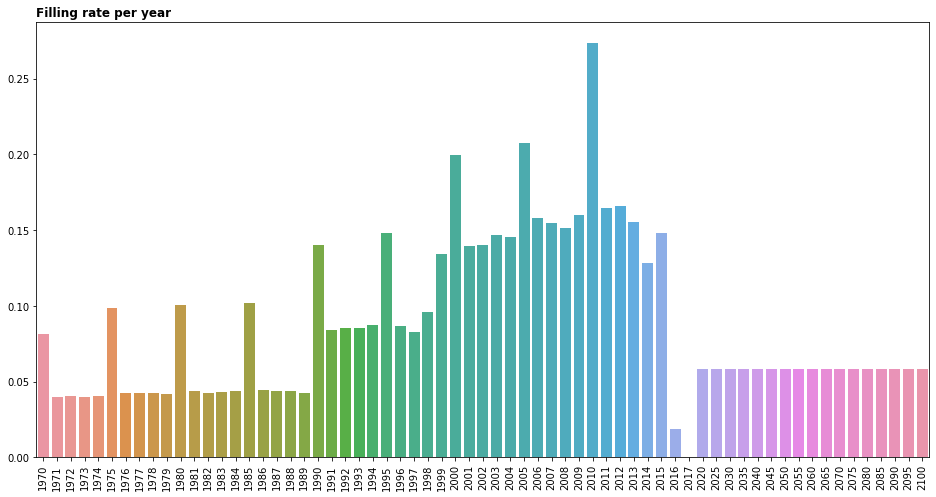

In [9]:
plt.figure(figsize = (16, 8))
sns.barplot(x = filling_rate_per_years.index, y = filling_rate_per_years.values)
plt.xticks(rotation = 90)
plt.title('Filling rate per year', fontweight = 'bold', loc = 'left')
plt.show()

### Per indicators

In [10]:
values_per_indicator = EdStatsData['Indicator Code'].value_counts()[0] * EdStatsData.iloc[:, :-4].shape[1]

In [11]:
values_per_indicator = EdStatsData['Indicator Code'].value_counts()[0] * EdStatsData.iloc[:, :-4].shape[1]
filling_rate_per_indicator = (EdStatsData.iloc[:, :-4].notna().groupby(EdStatsData['Indicator Code'], sort = False).sum().sum(axis = 1) / values_per_indicator).sort_values()

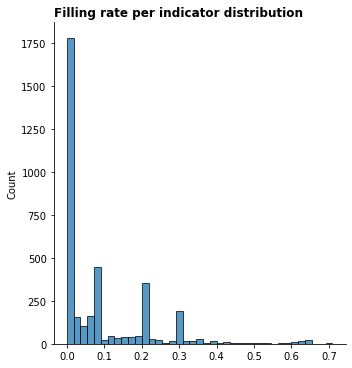

In [12]:
sns.displot(filling_rate_per_indicator)
plt.title('Filling rate per indicator distribution', fontweight = 'bold', loc = 'left')
plt.show()

In [13]:
f'% of indicators with more 50% of filled values: {(filling_rate_per_indicator > 0.5).sum() / len(filling_rate_per_indicator):.2%}'

'% of indicators with more 50% of filled values: 1.69%'

### Per country

In [14]:
values_per_country = EdStatsData['Country Name'].value_counts()[0] * EdStatsData.iloc[:, :-4].shape[1]

In [15]:
filling_rate_per_country = (EdStatsData.iloc[:, :-4].notna().groupby(EdStatsData['Country Name'], sort = False).sum().sum(axis = 1) / values_per_country).sort_values()

In [16]:
filling_rate_per_contry = (EdStatsData.iloc[:, :-4].notna().groupby(EdStatsData['Indicator Code'], sort = False).sum().sum(axis = 1) / values_per_indicator).sort_values()

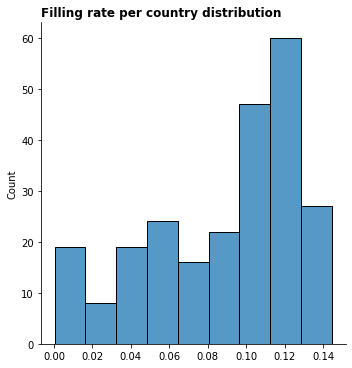

In [17]:
sns.displot(filling_rate_per_country)
plt.title('Filling rate per country distribution', fontweight = 'bold', loc = 'left')
plt.show()

#### World map of datapoints

In [18]:
geolocator = Nominatim(user_agent="openclassroom_project_2")

In [19]:
def get_loc(country:str, geo_dict:dict):
    location = geolocator.geocode(country)
    latitude = location.latitude
    longitude = location.longitude
    geo_dict[country] = dict()
    geo_dict[country]['latitude'] = latitude
    geo_dict[country]['longitude'] = longitude
    geo_dict[country]['datapoints'] = datapoints
    
    return geo_dict
    
geo_dict = dict()
for country, datapoints in filling_rate_per_country.iteritems():
    try:
        geo_dict = get_loc(country, geo_dict)
    except:
        try:
            geo_dict = get_loc(country.split(',')[0], geo_dict)
        except Exception as e:                                    
            print(f'Error {e} for {country}')

Error 'NoneType' object has no attribute 'latitude' for Virgin Islands (U.S.)
Error 'NoneType' object has no attribute 'latitude' for Europe & Central Asia (excluding high income)
Error 'NoneType' object has no attribute 'latitude' for East Asia & Pacific (excluding high income)
Error 'NoneType' object has no attribute 'latitude' for Upper middle income
Error 'NoneType' object has no attribute 'latitude' for Sub-Saharan Africa
Error 'NoneType' object has no attribute 'latitude' for Sub-Saharan Africa (excluding high income)
Error 'NoneType' object has no attribute 'latitude' for Low & middle income
Error 'NoneType' object has no attribute 'latitude' for OECD members
Error 'NoneType' object has no attribute 'latitude' for Lower middle income
Error 'NoneType' object has no attribute 'latitude' for Heavily indebted poor countries (HIPC)
Error 'NoneType' object has no attribute 'latitude' for Least developed countries: UN classification
Error 'NoneType' object has no attribute 'latitude' f

In [20]:
m = folium.Map(location=[12,1], zoom_start=2)
for country in geo_dict.keys():
    folium.Circle(location=[geo_dict[country]['latitude'], geo_dict[country]['longitude']],
                  popup=country,
                  radius= geo_dict[country]['datapoints'] * 1000000,
                  color='crimson',
                  fill=True,
                  fill_color='crimson').add_to(m)

In [21]:
m

## Duplicates values

In [22]:
index_null_row = EdStatsData.iloc[:, :-4].isna().sum(axis = 1)[EdStatsData.iloc[:, :-4].isna().sum(axis = 1) == 65].index
EdStatsData_notna = EdStatsData[~EdStatsData.index.isin(index_null_row)]

In [23]:
f"% of duplicates values in EdStatsData: {(len(EdStatsData_notna) - len(EdStatsData_notna.drop(columns = ['Indicator Name', 'Indicator Code']).drop_duplicates())) / len(EdStatsData_notna):.2%}"

'% of duplicates values in EdStatsData: 3.48%'

> Some indicators measure the same things!

## Data cleaning 

Restrict analysis on 1990 to 2015

In [24]:
for column in EdStatsData:
    try:
        if int(column) > 2015 or int(column) < 1990:
            EdStatsData.drop(columns = column, inplace = True)
    except:
        pass

### Add filling rate (all year and 2010) by indicators in EdStatsSeries

2010 pour les variables fixes

In [25]:
values_per_indicator_all_years = EdStatsData['Indicator Code'].value_counts()[0] * EdStatsData.iloc[:,:26].shape[1]
filling_rate = (EdStatsData.iloc[:,:26].notna().groupby(EdStatsData['Indicator Code'], sort = False).sum().sum(axis = 1) / values_per_indicator_all_years)

In [26]:
EdStatsSeries.set_index('Series Code', inplace = True)

In [27]:
EdStatsSeries['filling_rate'] = filling_rate

In [28]:
values_per_indicator_2010 = EdStatsData['Indicator Code'].value_counts()[0]
filling_rate_2010 = EdStatsData['2010'].notna().groupby(EdStatsData['Indicator Code'], sort = False).sum() / values_per_indicator_2010

In [29]:
EdStatsSeries['filling_rate_2010'] = filling_rate_2010

## Variables selection

In [53]:
def feature_research(pattern:str, topic:str = None, percentage:bool=True) -> 'feature_list':
    feature_list = list()
    for row in EdStatsSeries.iterrows():
        if topic != None and percentage == True:
            if re.search('percentage', row[1]['Long definition'].lower()) \
            and re.search(pattern, row[1]['Long definition'].lower()) \
            and row[1]['Topic'] == topic:
                feature_list.append(row[0])
        elif topic != None and percentage == False:
            if re.search(pattern, row[1]['Long definition'].lower()) \
            and row[1]['Topic'] == topic:
                feature_list.append(row[0])
                
        elif topic == None and percentage == True:
            if re.search('percentage', row[1]['Long definition'].lower()) \
            and re.search(pattern, row[1]['Long definition'].lower()):
                feature_list.append(row[0])
            
        else: # topic == None and percentage == False
            if re.search(pattern, row[1]['Long definition'].lower()):
                feature_list.append(row[0])
    return feature_list

### Punctual indicators

#### Upper Secondary

In [31]:
upper_secondary_feature_list = feature_research('upper secondary', topic = 'Secondary')

In [32]:
EdStatsSeries.loc[EdStatsSeries.index.isin(upper_secondary_feature_list)][['Long definition',
                                                                           'filling_rate_2010',
                                                                           'filling_rate',]].sort_values(['filling_rate_2010',
                                                                                                          'filling_rate'], 
                                                                                                 ascending = [False, False])


,Long definition,filling_rate_2010,filling_rate
Series Code,,,
UIS.FEP.3.GPV,Number of female general education students at the upper secondary level expressed as a percentage of the total number of general education students (male and female) at the upper secondary level in a given school year.,0.752066,0.486809
UIS.FEP.3,Number of female students at the upper secondary level expressed as a percentage of the total number of students (male and female) at the upper secondary level in a given school year.,0.719008,0.507788
SE.SEC.ENRR.UP,"Total enrollment in upper secondary education, regardless of age, expressed as a percentage of the total population of official upper secondary education age.",0.702479,0.524793
SE.SEC.ENRR.UP.MA,"Total male enrollment in upper secondary education, regardless of age, expressed as a percentage of the male population of official upper secondary education age.",0.698347,0.512397
UIS.GTVP.3.GPV,"Total number of students enrolled in general programmes at the upper secondary education level, expressed as a percentage of the total number of students enrolled in all programmes (vocational and general) at the upper secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the foundation for ...",0.690083,0.449142
UIS.GTVP.3.GPV.M,"Total number of male students enrolled in general programmes at the upper secondary education level, expressed as a percentage of the total number of male students enrolled in all programmes (vocational and general) at the upper secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the found...",0.690083,0.441990
UIS.GTVP.3.GPV.F,"Total number of female students enrolled in general programmes at the upper secondary education level, expressed as a percentage of the total number of female students enrolled in all programmes (vocational and general) at the upper secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the f...",0.690083,0.441831
UIS.GTVP.3.V,"Total number of students enrolled in vocational programmes at the upper secondary education level, expressed as a percentage of the total number of students enrolled in all programmes (vocational and general) at the upper secondary level. Vocational education is designed for learners to acquire the knowledge, skills and competencies specific to a particular occupation or trade or class of occupations or trades. Vocational education may have work-based components (e.g. apprenticeships). Succe...",0.590909,0.385887
UIS.GTVP.3.V.M,"Total number of male students enrolled in vocational programmes at the upper secondary education level, expressed as a percentage of the total number of male students enrolled in all programmes (vocational and general) at the upper secondary level. Vocational education is designed for learners to acquire the knowledge, skills and competencies specific to a particular occupation or trade or class of occupations or trades. Vocational education may have work-based components (e.g. apprenticeshi...",0.590909,0.379212


> SE.SEC.ENRR.UP (70 % en 2010): Total enrollment in upper secondary education, regardless of age, expressed as a percentage of the total population of official upper secondary education age

##### Research on correlations

In [33]:
t = EdStatsData[['Country Name','Indicator Code','2010']][EdStatsData['Indicator Code'].isin(upper_secondary_feature_list)]

In [34]:
e = pd.DataFrame(columns = t['Country Name'].unique(), index = t['Indicator Code'].unique())

In [35]:
for country in e.columns:
    e[country] = t[t['Country Name'] == country].drop('Country Name', 1).set_index('Indicator Code')

In [36]:
e.transpose().corr()['SE.SEC.ENRR.UP'].sort_values()

UIS.ROFST.3.M.CP    -0.904509
UIS.ROFST.3.CP      -0.902175
UIS.ROFST.3.F.CP    -0.893698
UIS.GTVP.3.GPV.M    -0.409839
UIS.GTVP.3.GPV      -0.364819
UIS.GTVP.3.GPV.F    -0.298791
UIS.FOFSTP.3        -0.233043
UIS.PRP.3           -0.207350
UIS.FEP.3.V          0.043068
UIS.GTVP.3.V.F       0.322566
UIS.GTVP.3.V         0.397389
UIS.GTVP.3.V.M       0.455186
UIS.FEP.3            0.462947
UIS.FEP.3.GPV        0.670288
UIS.NERA.3.M         0.891068
UIS.NER.3.M          0.900872
UIS.NERA.3           0.923931
UIS.NER.3            0.931166
UIS.NERA.3.F         0.939681
UIS.NER.3.F          0.942965
SE.SEC.ENRR.UP.MA    0.987159
SE.SEC.ENRR.UP       1.000000
Name: SE.SEC.ENRR.UP, dtype: float64

#### Tertiary school

In [43]:
tertiary_feature_list = feature_research('tertiary', topic = 'Tertiary')

EdStatsSeries.loc[EdStatsSeries.index.isin(tertiary_feature_list)][['Long definition',
                                                                           'filling_rate_2010',
                                                                           'filling_rate',]].sort_values(['filling_rate_2010',
                                                                                                  'filling_rate'], 
                                                                                                 ascending = [False, False])


,Long definition,filling_rate_2010,filling_rate
Series Code,,,
UIS.GOER.56,Total number of mobile tertiary students coming from a country/region as a percentage of the population of tertiary student age in their home country.,0.863636,0.522886
SE.TER.ENRL.FE.ZS,Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.,0.673554,0.553083
UIS.OMR.56,Number of students from a given country studying abroad as a percentage of the total tertiary enrolment in that country.,0.657025,0.382549
SE.TER.ENRR,"Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.",0.652893,0.591068
SE.TER.ENRR.FE,"Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving.",0.644628,0.539733
SE.TER.ENRR.MA,"Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving.",0.644628,0.539733
SE.TOT.ENRR,"Total enrollment in primary, secondary and tertiary education, regardless of age, expressed as a percentage of the total population of primary school age, secondary school age, and the five-year age group following on from secondary school leaving. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",0.566116,0.491418
UIS.TEP.5.B,Total enrolment in short-cycle tertiary programmes (ISCED 5) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).,0.537190,0.315480
UIS.FEP.5.B,Number of female students enrolled in short-cycle tertiary programmes (ISCED 5) expressed as a percentage of the total number of students (male and female) enrolled in short-cycle tertiary programmes (ISCED 5) in a given school year.,0.528926,0.311507


> SE.TER.ENRR (64 % in 2010): Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.	0.652893

#### Internet covering

In [46]:
EdStatsSeries[EdStatsSeries.Topic == 'Infrastructure: Communications'][['Indicator Name', 'Long definition', 'filling_rate_2010', 'filling_rate']]

,Indicator Name,Long definition,filling_rate_2010,filling_rate
Series Code,,,,
IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computers designed to be used by a single individual.,0.000000,0.417832
IT.NET.USER.P2,Internet users (per 100 people),"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.",0.938017,0.811030


> IT.NET.USER.P2 (93% en 2010): Internet users (per 100 people)

#### Mobility

In [54]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('transport', percentage = False))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values(
    ['filling_rate_2010',
     'filling_rate'], 
    ascending = [False, False])

,Long definition,filling_rate_2010,filling_rate
Series Code,,,
UIS.XSPENDP.1.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional) of the specified level of education. Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activi...",0.330579,0.153528
UIS.XSPENDP.23.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional) of the specified level of education. Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activi...",0.326446,0.156230
UIS.XSPENDP.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional). Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activities. Divide current expenditure oth...",0.318182,0.150509
UIS.XSPENDP.0.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional) of the specified level of education. Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activi...",0.305785,0.140655
UIS.XSPENDP.3.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional) of the specified level of education. Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activi...",0.276860,0.128576
UIS.XSPENDP.2.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional) of the specified level of education. Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activi...",0.268595,0.124444
UIS.XSPENDP.4.FDPUB.FNNONS,"Current expenditure other than for staff compensation expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional) of the specified level of education. Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure other than for staff compensation includes expenditure on school books and teaching materials, ancillary services (ex. food, transport), and administration and other support activi...",0.152893,0.070566
OECD.TSAL.1.E0,"Starting salaries refer to the average scheduled gross salary per year for a full-time teache

In [55]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('mobility', percentage = False))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values(
    ['filling_rate_2010',
     'filling_rate'], 
    ascending = [False, False])

,Long definition,filling_rate_2010,filling_rate
Series Code,,,


> No relevant features on this topic

##### Cost of study

In [64]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('costs', percentage = False))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values(
    ['filling_rate_2010',
     'filling_rate'], 
    ascending = [False, False])

,Long definition,filling_rate_2010,filling_rate
Series Code,,,
SE.XPD.TERT.ZS,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.479339,0.322155
SE.XPD.SECO.ZS,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.446281,0.287826
SE.XPD.PRIM.ZS,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.438017,0.290687
UIS.XPUBP.3,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.326446,0.144946
UIS.XPUBP.2,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.326446,0.141926
UIS.XPUBP.UK,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.256198,0.124762
UIS.XPUBP.2T4.V,"Expenditure on education by level/type of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should ...",0.016529,0.013350
UIS.XPubP.0,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of educatio

In [71]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('fee', percentage = False))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values(
    ['filling_rate_2010',
     'filling_rate'], 
    ascending = [False, False])

,Long definition,filling_rate_2010,filling_rate
Series Code,,,
LO.PIRLS.REA.ADV,"Fourth grade students reaching the advanced international benchmark in reading achievement (%) is the share of fourth grade students scoring at least 625 on the reading assessment. When reading Literary Texts, students at the advanced international benchmarking level can: A) Integrate ideas and evidence across a text to appreciate overall themes, and B) Interpret story events and character actions to provide reasons, motivations, feelings, and character traits with full text-based support. W...",0.0,0.017165
LO.PIRLS.REA.HI,"Fourth grade students reaching the high international benchmark in reading achievement (%) is the share of fourth grade students scoring at least 550 on the reading assessment. When reading Literary Texts, students at the high benchmarking level can A) Locate and distinguish significant actions and details embedded across the text, B) Make inferences to explain relationships between intentions, actions, events, and feelings, and give text-based support, C) Interpret and integrate story event...",0.0,0.017165
LO.PIRLS.REA.INT,"Fourth grade students reaching the intermediate international benchmark in reading achievement (%) is the share of fourth grade students scoring at least 475 on the reading assessment. When reading Literary Texts, students at the intermediate benchmarking level can A) Retrieve and reproduce explicitly stated actions, events, and feelings, B) Make straightforward inferences about the attributes, feelings, and motivations of main characters, C) Interpret obvious reasons and causes and give sim...",0.0,0.017165
LO.PIRLS.REA.ADV.FE,"Female 4th grade students reaching the advanced international benchmark in reading achievement (%) is the share of female 4th grade students scoring at least 625 on the reading assessment. When reading Literary Texts, students at the advanced international benchmarking level can: A) Integrate ideas and evidence across a text to appreciate overall themes, and B) Interpret story events and character actions to provide reasons, motivations, feelings, and character traits with full text-based su...",0.0,0.017006
LO.PIRLS.REA.ADV.MA,"Male 4th grade students reaching the advanced international benchmark in reading achievement (%) is the share of male 4th grade students scoring at least 625 on the reading assessment. When reading Literary Texts, students at the advanced international benchmarking level can: A) Integrate ideas and evidence across a text to appreciate overall themes, and B) Interpret story events and character actions to provide reasons, motivations, feelings, and character traits with full text-based suppor...",0.0,0.017006
LO.PIRLS.REA.HI.FE,"Female 4th grade students reaching the high international benchmark in reading achievement (%) is the share of female 4th grade students scoring at least 550 on the reading assessment. When reading Literary Texts, students at the high benchmarking level can A) Locate and distinguish significant actions and details embedded across the text, B) Make inferences to explain relationships between intentions, actions, events, and feelings, and give text-based support, C) Interpret and integrate sto...",0.0,0.017006
LO.PIRLS.REA.HI.MA,"Male 4th grade students reaching the high international benchmark in reading achievement (%) is the share of male 4th grade students scoring at least 550 on the reading assessment. When reading Literary Texts, students at the high benchmarking level can A) Locate and distinguish significant actions and details embedded across the text, B) Make inferences to explain relationships between intentions, actions, events, and feelings, and give text-based support, C) Interpret and integrate story e...",0.0,0.017006
LO.PIRLS.REA.INT.FE,"Female 4th grade students reaching the intermediate international benchmark in reading achievement (%) is the share of female 4th grade students scoring at least 475 on the reading as

In [72]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('expense', percentage = False))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values(
    ['filling_rate_2010',
     'filling_rate'], 
    ascending = [False, False])

,Long definition,filling_rate_2010,filling_rate
Series Code,,,


> No relevant features on this topic

#### Incomes

In [75]:
EdStatsCountry['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

### Projection indicators

growth = (End Value / Start Value) ^ (1 / Number of Years) -1

or estimate slope of linear regression

#### Female education 

##### Upper secondary

In [81]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('upper secondary|female', percentage = True, topic = 'Secondary'))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values('filling_rate', ascending = False)

,Long definition,filling_rate_2010,filling_rate
Series Code,,,
SE.SEC.ENRL.GC.FE.ZS,Number of female students enrolled in general programmes at the secondary education level expressed as a percentage of the total number of students (male and female) enrolled in general programmes at the secondary education level in a given school year.,0.752066,0.698506
SE.SEC.ENRL.FE.ZS,Number of female students enrolled in all secondary education programmes expressed as a percentage of the total number of students (male and female) enrolled at the secondary education level in a given school year.,0.727273,0.637953
SE.SEC.ENRR.FE,"Total female enrollment in secondary education, regardless of age, expressed as a percentage of the female population of official secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",0.702479,0.618722
UIS.GTVP.23.GPV.F,"Total number of female students enrolled in general programmes at the secondary education level, expressed as a percentage of the total number of female students enrolled in all programmes (vocational and general) at the secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the foundation fo...",0.694215,0.592816
UIS.GER.123.F,"Total female enrollment in primary and secondary education, regardless of age, expressed as a percentage of the total female population of official primary and secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",0.673554,0.575652
SE.SEC.ENRL.FE.VO.ZS,"Total number of female students enrolled in vocational programmes at the secondary education level, expressed as a percentage of the total number of female students enrolled in all programmes (vocational and general) at the secondary level. Vocational education is designed for learners to acquire the knowledge, skills and competencies specific to a particular occupation or trade or class of occupations or trades. Vocational education may have work-based components (e.g. apprenticeships). Suc...",0.623967,0.571043
SE.SEC.ENRL.VO.FE.ZS,Number of female students enrolled in vocational programmes at the secondary education level expressed as a percentage of the total number of students (male and female) enrolled in vocational programmes at the secondary education level in a given school year.,0.611570,0.554514
SE.SEC.ENRR.LO.FE,"Total female enrollment in lower secondary education, regardless of age, expressed as a percentage of the total female population of official lower secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",0.727273,0.552606
UIS.FEP.2,Number of female students at the lower secondary level expressed as a percentage of the total number of students (male and female) at the lower secondary level in a given school year.,0.739669,0.540687


> SE.SEC.ENRL.FE.ZS (63 % all years) :Number of female students enrolled in all secondary education programmes expressed as a percentage of the total number of students (male and female) enrolled at the secondary education level in a given school year.	0.727273

In [82]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('tertiary|female', percentage = True, topic = 'Tertiary'))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values('filling_rate', ascending = False)

,Long definition,filling_rate_2010,filling_rate
Series Code,,,
SE.TER.ENRR,"Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.",0.652893,0.591068
SE.TER.ENRL.FE.ZS,Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.,0.673554,0.553083
SE.TER.ENRR.FE,"Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving.",0.644628,0.539733
SE.TER.ENRR.MA,"Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving.",0.644628,0.539733
UIS.GOER.56,Total number of mobile tertiary students coming from a country/region as a percentage of the population of tertiary student age in their home country.,0.863636,0.522886
SE.TOT.ENRR,"Total enrollment in primary, secondary and tertiary education, regardless of age, expressed as a percentage of the total population of primary school age, secondary school age, and the five-year age group following on from secondary school leaving. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",0.566116,0.491418
UIS.OMR.56,Number of students from a given country studying abroad as a percentage of the total tertiary enrolment in that country.,0.657025,0.382549
UIS.TEP.5.B,Total enrolment in short-cycle tertiary programmes (ISCED 5) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).,0.537190,0.315480
UIS.FEP.5.B,Number of female students enrolled in short-cycle tertiary programmes (ISCED 5) expressed as a percentage of the total number of students (male and female) enrolled in short-cycle tertiary programmes (ISCED 5) in a given school year.,0.528926,0.311507


> SE.TER.ENRL.FE.ZS (55 % all years): 	Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.

In [87]:
EdStatsSeries.loc[EdStatsSeries.index.isin(feature_research('secondary|tertiary', percentage = True, topic = 'Expenditures'))][
    ['Long definition',
     'filling_rate_2010',
     'filling_rate',]].sort_values('filling_rate', ascending = False)

,Long definition,filling_rate_2010,filling_rate
Series Code,,,
SE.XPD.TOTL.GD.ZS,"Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. Divide total government expenditure for a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. A higher percentage of GDP spent on education shows a higher government priority for education, but also a highe...",0.528926,0.396853
SE.XPD.TERT.ZS,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.479339,0.322155
SE.XPD.PRIM.ZS,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.438017,0.290687
SE.XPD.SECO.ZS,"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take ...",0.446281,0.287826
SE.XPD.PRIM.PC.ZS,"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed as a percentage of GDP per capita. Divide total government expenditure for a given level of education (ex. primary, secondary) by total enrolment in that same level, divide again by GDP per capita, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",0.433884,0.236173
UIS.XGDP.56.FSGOV,"Total general (local, regional and central) government expenditure on tertiary education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. Divide total government expenditure for a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Edu...",0.466942,0.223776
UIS.XGDP.1.FSGOV,"Total general (local, regional and central) government expenditure on primary education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. Divide total government expenditure for a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Educ...",0.438017,0.214558
SE.XPD.TERT.PC.ZS,"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed as a percentage of GDP per capita. Divide total government expendi

> SE.XPD.TOTL.GD.ZS (39% of all years): Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP.

### Analysis of features

#### Get languages

In [ ]:
EdStatsData['Country Name'].unique()

In [90]:
import pycountry

In [96]:
countries = {}
for country in pycountry.countries:
    countries[country.name.split(',')[0]] = country.alpha_2

In [103]:
codes = {country.split(',')[0]:countries.get(country.split(',')[0], 'Unknown code') for country in EdStatsData['Country Name'].unique()}

In [105]:
import lxml.etree
import urllib.request

def get_territory_languages():
    url = "https://raw.githubusercontent.com/unicode-org/cldr/master/common/supplemental/supplementalData.xml"
    langxml = urllib.request.urlopen(url)
    langtree = lxml.etree.XML(langxml.read())

    territory_languages = {}
    for t in langtree.find('territoryInfo').findall('territory'):
        langs = {}
        for l in t.findall('languagePopulation'):
            langs[l.get('type')] = {
                'percent': float(l.get('populationPercent')),
                'official': bool(l.get('officialStatus'))
            }
        territory_languages[t.get('type')] = langs
    return territory_languages

In [106]:
territory_languages = get_territory_languages()

In [107]:
language_dict = dict()
for country in codes.keys():
    try:
        language_dict[country] = list(territory_languages[codes[country]].keys())[0]
    except Exception as e:
        print(f'Error {e} for {country}')

Error 'Unknown code' for Arab World
Error 'Unknown code' for East Asia & Pacific
Error 'Unknown code' for East Asia & Pacific (excluding high income)
Error 'Unknown code' for Euro area
Error 'Unknown code' for Europe & Central Asia
Error 'Unknown code' for Europe & Central Asia (excluding high income)
Error 'Unknown code' for European Union
Error 'Unknown code' for Heavily indebted poor countries (HIPC)
Error 'Unknown code' for High income
Error 'Unknown code' for Latin America & Caribbean
Error 'Unknown code' for Latin America & Caribbean (excluding high income)
Error 'Unknown code' for Least developed countries: UN classification
Error 'Unknown code' for Low & middle income
Error 'Unknown code' for Low income
Error 'Unknown code' for Lower middle income
Error 'Unknown code' for Middle East & North Africa
Error 'Unknown code' for Middle East & North Africa (excluding high income)
Error 'Unknown code' for Middle income
Error 'Unknown code' for North America
Error 'Unknown code' for OEC

In [117]:
languages_series = pd.Series(language_dict)
languages_counts = languages_series.value_counts()

ponctual:
SE.SEC.ENRR.UP

SE.TER.ENRR

SE.SEC.ENRL.FE.ZS

EdStatsCountry['Income Group']

temporel:
SE.SEC.ENRL.FE.ZS

SE.TER.ENRL.FE.ZS

SE.XPD.TOTL.GD.ZS



In [130]:
EdStatsData

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country Code,Country Name,Indicator Code,Indicator Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, both sexes (%)"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, female (%)"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, male (%)"
4,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,ARB,Arab World,SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sexes (%)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,ZWE,Zimbabwe,UIS.LP.AG15T24.M,"Youth illiterate population, 15-24 years, male (number)"
886926,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,ZWE,Zimbabwe,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, both sexes (%)"
886927,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,ZWE,Zimbabwe,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, female (%)"
886928,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,ZWE,Zimbabwe,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, gender parity index (GPI)"


In [133]:
EdStatsData[EdStatsData['Indicator Code'] =='SE.SEC.ENRR.UP'][['Country Name', '2010']]

,Country Name,2010
1343,Arab World,49.385880
5008,East Asia & Pacific,67.705742
8673,East Asia & Pacific (excluding high income),65.026497
12338,Euro area,108.390083
16003,Europe & Central Asia,94.425270
19668,Europe & Central Asia (excluding high income),82.741570
23333,European Union,104.235603
26998,Heavily indebted poor countries (HIPC),24.696800
30663,High income,98.705673
34328,Latin America & Caribbean,75.409828
